## imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## simple aid functions:

In [82]:
# Calculate the slope of 2 points.

def slope(x1,y1,x2,y2):
    val1 = y1-y2
    val2 = x1-x2
    return val1/val2

In [83]:
# Check degree between two lines. True if about 90 degrees (if two lines are vertical).

def check(slope1, slope2):
    val = slope1 * slope2
    return (val <= -0.75 and val >= -1.25)
    

In [84]:
def distance(x1,y1,x2,y2):
    val1 = (x1-x2) **2
    val2 = (y1-y2) **2
    return (val1+val2)**0.5

In [85]:
def is_new_shape(distance, limit):
    return distance > limit

### Functions used to load a drawing:

In [86]:
def get_location(n,k,file_type):
    start = "train/"
    if(n==1):
        start += "7554/"
    if(n==2):
        start+= "7556/"
    if(n==3):
        start+= "7557/"
    if(n==4):
        start+= "7558/"
    if(n==5):
        start+= "7559/"
    if(n==6):
        start+= "7560/"
    if(n==7):
        start+= "7561/"
    if(n==8):
        start+= "7563/"
    if(n==9):
        start+= "7569/"
    if(n==10):
        start+= "7570/"
    if(n==11):
        start+= "7571/"
    if(n==12):
        start+= "7572/"
    if(n==13):
        start+= "7573/"
    if(n==14):
        start+= "7574/"
        
    start += "SimpleTest/"
    
    start += str(k)+"."+file_type
    return start

In [87]:
def get_draw(n,k):
    location = get_location(n,k,"png")
    img = Image.open(location)
    plt.imshow(img)

In [88]:
def get_df(n,k):
    return pd.read_csv(get_location(n,k,"csv"))

## main Functions:

### Main Function: How many hand-lifts (shapes)?

In [14]:
# Returns the number of hand lifts (number of shapes) in a given drawing.
# Specify 'distance_limit' = 20.

def n_of_h_l(drawing,distance_limit):
    
    temp = drawing.copy()
    temp = get_better_df(temp)   
    
    return (len(temp[temp['distance']>distance_limit]) + 1)

#### assistant function for n_of_h_l function:

In [ ]:
# Returns a drawing dataset with the following columns:
# 1. y2-y1
# 2. x2-x1
# 3. distance
# 4. slope
# 5. angle (calculated by: 'tan(alpha) = slope')
# 6. diff_angle

def get_better_df(drawing):
    temp = drawing.copy()
    rows = temp.shape[0]
    index1 = rows - 1;
    index2 = rows - 2;
    temp.drop(axis = 0, index = [index1,index2], inplace = True)
    temp['X'] = pd.to_numeric(temp['X'])
    temp['y2-y1'] = temp[' Y'].diff()
    temp['x2-x1'] = temp['X'].diff()
    temp["distance"]= ((temp["y2-y1"])**2 + (temp["x2-x1"])**2)**0.5 # The distance between two adjacent points.
    temp["slope"]= temp["y2-y1"]/temp["x2-x1"] # Includes NaN values since we're dividing by zero sometimes.
    temp["angle"]= np.arctan(temp["slope"])
    temp["diff_angle"] = temp["angle"].diff() # Difference between every two adjacent angles.
    
    return temp

In [ ]:
# Adding a new column: 'num_of_shape'
# Each data-point belongs to a specific shape. 

def divide_2_shapes(drawing,distance_limit):
    
    drawing = get_better_df(drawing)
    
    drawing["is_2_far"] = drawing["distance"]>distance_limit
    drawing["num_of_shape"] = 1
    
    i = 0
    value = 1
    while (i < drawing.shape[0]):
        if (drawing.loc[:,"is_2_far"].iloc[i] == True):
            value += 1
        drawing.loc[:,"num_of_shape"].iloc[i] = value
        i += 1
        
    drawing.drop(axis=1,inplace=True,columns="is_2_far") # Dropping unnecessary column.
    
    return drawing

##### Testing for different drawings.

C:\Users\noams\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,X,Y,Pressure,TiltX,TiltY,Time,y2-y1,x2-x1,distance,slope,angle,diff_angle,num_of_shape
714,479.855873,496.813027,0.681147,-3819.0,1666.0,00:15.5794018,0.210648,2.633099,2.641511,0.080000,0.079830,-0.038262,10
715,482.015013,497.181661,0.660395,-3769.0,1638.0,00:15.5794018,0.368634,2.159141,2.190383,0.170732,0.169101,0.089271,10
716,482.488971,497.286985,0.652827,-3769.0,1638.0,00:15.5950274,0.105324,0.473958,0.485519,0.222222,0.218669,0.049568,10
717,484.174154,498.024252,0.603265,-3769.0,1638.0,00:15.5950274,0.737268,1.685183,1.839404,0.437500,0.412410,0.193741,10
718,484.174154,498.024252,0.589837,-3769.0,1638.0,00:15.6106472,0.000000,0.000000,0.000000,NaN,NaN,NaN,10


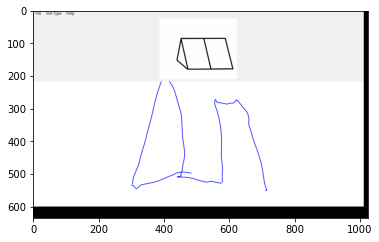

In [12]:
## test for the "divied_2_shapes" function:

get_draw(1,20)
divide_2_shapes(get_df(1,20),10).tail(5)

#### Testing n_of_h_l function:

In [40]:
def Test_n_of_h_l(kid_n,draw_n,distance_limit):
    print(n_of_h_l(get_df(kid_n,draw_n),distance_limit))
    get_draw(kid_n,draw_n)

1


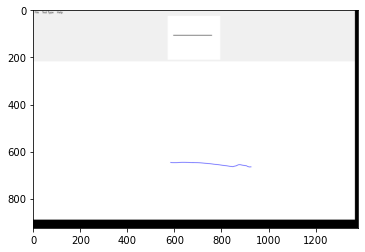

In [41]:
Test_n_of_h_l(1,1,20)

1


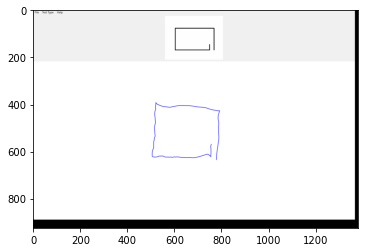

In [46]:
Test_n_of_h_l(1,6,20)

10


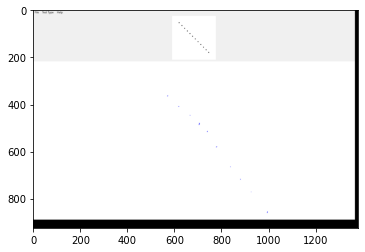

In [49]:
Test_n_of_h_l(1,7,20)

5


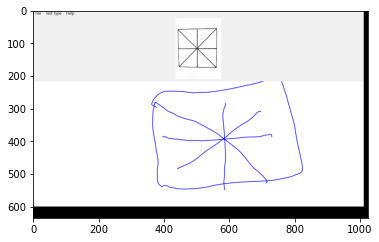

In [52]:
Test_n_of_h_l(1,13,20)

6


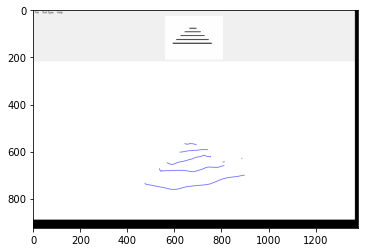

In [56]:
Test_n_of_h_l(2,9,20)

2


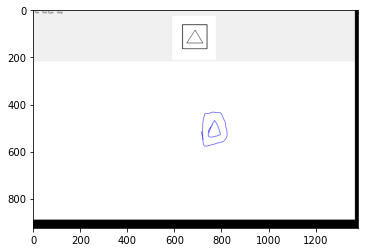

In [57]:
Test_n_of_h_l(5,8,20)

2


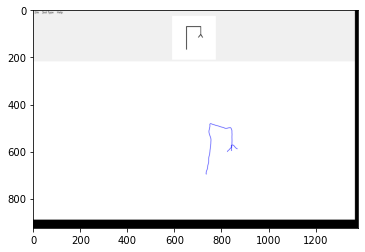

In [63]:
Test_n_of_h_l(6,5,20)

2


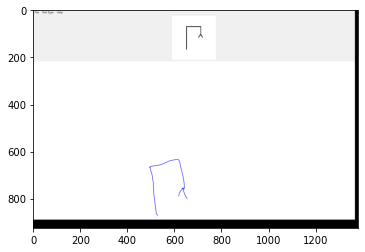

In [74]:
Test_n_of_h_l(4,5,20)

### Main function: How many lines?

In [89]:
# This function iterates through 'drawing' DataFrame.
# On each iteration, a sub-DataFrame is created.
# This sub-DataFrame, represents a specific shape.
# It is sent to 'howManyLines', which then calculates the amount of lines the shape is built of.

# Eventually, the main function returns a list.
# Each item in the list represents the amount of lines of a certain shape.

def totalLines(drawing, distanceLimit, val, margin):
    
    # List -> will contain amount of lines of each shape.
    shape_lines = []
    
    # Get the amount of different shapes (hand lifts):
    shapeAmount =  n_of_h_l(drawing, distanceLimit)
    
    # Creating temporary copy of 'Drawing' dataset.
    temp = drawing.copy()
    temp = divide_2_shapes(temp, distanceLimit)
    
    currentShapeNum = 1
    while (currentShapeNum <= shapeAmount):
        
        shape_df = temp[temp['num_of_shape'] == currentShapeNum] 
        value = howManyLines(shape_df, val, margin)
        shape_lines.append(value)
        
        currentShapeNum += 1
    
    return shape_lines

#### assistant functions for totalLines function:

In [94]:
# Let 'l' be the line between points <x1,y1> --> <x3,y3>.
# Function returns True <=> point <x2,y2> is on 'l'.

def isOnLine(x1,y1,x2,y2,x3,y3,margin):
    
    # print()
    # print('<x1,y1> = <',x1,',',y1,'>')
    # print('<x2,y2> = <',x2,',',y2,'>')
    # print('<x3,y3> = <',x3,',',y3,'>')
    # print()
    
    m = slope(x1,y1,x3,y3) # calculating the slope between <x1,y1> and <x3,y3>.
    
    # print('m = ',m)
    
    const = y1 - m*x1
    val = m*x2 +const
    
    # print()
    # print('y2 = ',y2)
    # print('val = ',val)
    # print()
    
    return ( (y2 >= val-margin) and (y2 <= val+margin) )

In [93]:
# Function returns amount of lines the shape is built of.

def howManyLines(shape_df, val, margin):
    
    # Adding a boolean column
    
    
    # Amount of lines to be returned.
    lineAmount = 1
    
    # length of DataFrame (amount of rows).
    length = shape_df.shape[0]
    
    # iterator -> iterate through the DataFrame.
    i = val
    
    # iteration process:
    while (i < length):
        
        # Grabbing point <x1,y1>
        x1 = shape_df.iloc[i-val,0]
        y1 = shape_df.iloc[i-val,1]
        
        # Grabbing point <x2,y2>
        x2 = shape_df.iloc[i,0]
        y2 = shape_df.iloc[i,1]
        
        # Are we out of bounds?
        if (i+val >= length):
            break
        
        # Grabbing point <x3,y3>
        x3 = shape_df.iloc[i+val,0]
        y3 = shape_df.iloc[i+val,1]
        
        if (not isOnLine(x1,y1,x2,y2,x3,y3,margin)):
            # print('It is not on the line!')
            lineAmount += 1
        
        i += val
    
    return lineAmount

#### Test totalLines function:

In [100]:
def Test_totalLines(kid_n,draw_n, distanceLimit, val, margin):
    print("number of hand lifts:",n_of_h_l(get_df(kid_n,draw_n),distanceLimit))
    print("number of lines (divied to shapes):",totalLines(get_df(kid_n,draw_n),distanceLimit,val,margin))
    get_draw(kid_n,draw_n)

number of hand lifts: 2
number of lines (divied to shapes): [4, 1]


C:\Users\noams\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


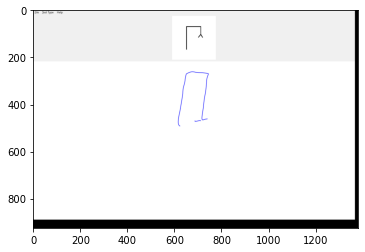

In [101]:
Test_totalLines(9,5,20,7,20)

number of hand lifts: 1
number of lines (divied to shapes): [1]


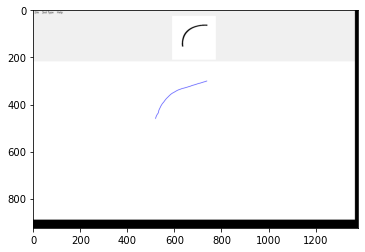

In [105]:
Test_totalLines(9,2,20,7,20)

number of hand lifts: 1
number of lines (divied to shapes): [2]


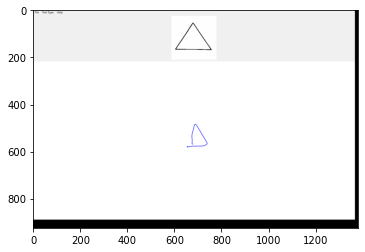

In [107]:
Test_totalLines(3,4,20,7,20)

number of hand lifts: 4
number of lines (divied to shapes): [1, 3, 1, 1]


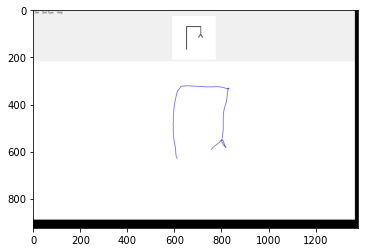

In [114]:
Test_totalLines(10,5,20,7,20)

number of hand lifts: 35
number of lines (divied to shapes): [2, 3, 1, 3, 3, 2, 3, 2, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 5, 2, 3, 3, 1, 4, 4, 6, 2, 3, 3, 7, 4, 4, 2, 3, 1]


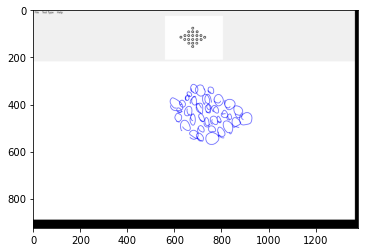

In [117]:
Test_totalLines(5,14,20,7,20)

number of hand lifts: 5
number of lines (divied to shapes): [5, 1, 1, 1, 1]


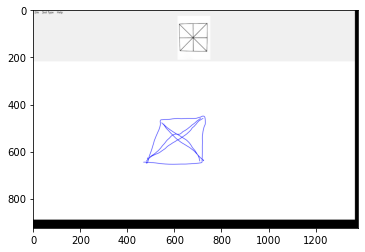

In [126]:
Test_totalLines(8,13,20,7,20)

#### Another method to calculate number of lines, using angles

In [27]:
# This function recieves 3 parameters:

## 1. 'drawing' 
## 2. 'degree_limit' --> Used to determine whether a new line is being drawn.
## 3. 'dis_limit' --> Used to determine whether a new shape is being drawn. 

# It returns the number of lines within the drawing.

def num_of_lines(drawing, degree_limit, dis_limit):
    
    drawing = divied_2_shapes(drawing,dis_limit)
    num_of_lines = 1
    num_of_shape = 1
    total_shapes = n_of_h_l(drawing,dis_limit)
    
    while (num_of_shape <= total_shapes):
        
        shape_df = drawing[drawing['num_of_shape'] == num_of_shape]
        amount = shape_df[ (shape_df['diff_angle'] >= degree_limit) | (shape_df['diff_angle'] <= -degree_limit)].shape[0]
        num_of_lines += amount
        
        num_of_shape += 1
        
    return num_of_lines

### Main function: How many open shapes?

In [31]:
# This function will loop over our 'drawing' DataFrame.
# It'll send sub-DataFrames, each representing a different shape to 'isOpenShape' function.
# this function will return a Boolean list. 
# The i-th slot value is True <=> The i-th shape of the drawing is open.

def shapeStatus(drawing, distanceLimit, margin):
    
    # The Boolean list to be returned.
    status = []
    
    # Get the amount of different shapes (hand lifts):
    shapeAmount =  n_of_h_l(drawing, distanceLimit)
    
    # Creating temporary copy of 'Drawing' dataset.
    temp = drawing.copy()
    temp = divide_2_shapes(temp, distanceLimit) 
    
    currentShapeNum = 1
    while (currentShapeNum <= shapeAmount):
        
        shape_df = temp[temp['num_of_shape'] == currentShapeNum] 
        value = checkIfOpen(shape_df, margin)
        status.append(value)
        
        currentShapeNum += 1
    
    return status

#### Assistant functions for shapeStatus function:

In [254]:
# This function receives a drawing of a specific shape.
# Returns true <=> The shape is open.
def checkIfOpen(shape_df, margin):
    
    # index of the current row:
    index = 0
    
    # length (how many rows) of DataFrame:
    rowAmount = shape_df.shape[0]
    
    while (index < rowAmount):
        
        xValue = shape_df.iloc[index, 0]
        yValue = shape_df.iloc[index, 1]
        if (hasCrossed(shape_df, xValue, yValue, index, margin)):
            return False # Shape is closed.
        
        index += 1
        
    return True # Shape is open.

In [262]:
# This function receives:

# 1. a dataframe drawing of a specific shape.
# 2. <x,y> values --> Check whether a data-point has those values.
# 3. index value --> Make sure we're not comparing a data-point to itself.

# Returns true <=> The shape is closed.

def hasCrossed(shapeDrawing, xValue, yValue, index, margin):
    
    # Number of DataFrame rows.
    numOfRows = shapeDrawing.shape[0]
    
    i = 0
    while (i < numOfRows):
        
        xPoint = shapeDrawing.iloc[i,0]
        yPoint = shapeDrawing.iloc[i,1]
        
        # Are we comparing a row to itself?
        if ( (i < index - 10) or (i > index + 10) ):
            
            distance_ = distance(xValue,yValue,xPoint,yPoint)
            
            if (distance_ <= margin):
                # print ('xPoint = xValue = ', xPoint)
                # print ('yPoint = yValue = ', yPoint)
                # print ('i = ',i)
                # print ('index = ',index)
                return True # Found another point with same coordinates.
        
        i += 1
    
    return False

#### Testing the shapeStatus function:

In [ ]:
def Test_shapeStatus(kid_n,draw_n, distanceLimit, val, margin):
    print("number of hand lifts:",n_of_h_l(get_df(kid_n,draw_n),distanceLimit))
    print("number of lines (divied to shapes):",totalLines(get_df(kid_n,draw_n),distanceLimit,val,margin))
    get_draw(kid_n,draw_n)

# -------------------------